In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [20]:
df = pd.read_csv("../예비5 - 변수선택용 proact 데이터/x_and_y_before_regression_final.csv")
df.drop(columns=['Unnamed: 0', 'ALSFRS_slope'], inplace=True)
df

,Age,Gender,onset_site,onset_delta,diag_delta,diag_minus_onset,mean_alsfrs_total,alsfrs_total_slope,fvc_slope,fvc_mean,...,slope_Q3_Swallowing,slope_Q4_Handwriting,slope_Q5_Cutting,slope_Q6_Dressing_and_Hygiene,slope_Q7_Turning_in_Bed,slope_Q8_Walking,slope_Q9_Climbing_Stairs,slope_Q10_Respiratory,slope_Bulbar,slope_motor
0,52.0,0.0,0.0,-501.0,-302.0,199.0,30.250000,-0.009689,0.284522,86.424228,...,0.000000,0.016393,0.000000,-0.016393,0.016393,0.000000,0.000000,0.000000,0.000000,-0.016393
1,65.0,0.0,1.0,-1023.0,-44.0,979.0,28.666667,0.002114,-0.583333,73.500000,...,0.000000,0.000000,0.000000,-0.010989,0.010989,0.010989,0.010989,0.000000,-0.010989,0.010989
2,66.0,0.0,1.0,-550.0,-462.0,88.0,32.000000,-0.043752,-0.057374,92.885179,...,-0.014493,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.014493,-0.014493,0.000000
3,41.0,1.0,2.0,-570.0,-511.0,59.0,16.500000,-0.104167,0.000000,71.000000,...,0.000000,-0.020833,0.000000,0.000000,-0.020833,-0.020833,0.000000,0.020833,-0.020833,-0.062500
4,63.0,1.0,2.0,-365.0,-209.0,156.0,30.000000,0.000000,-0.235294,114.000000,...,0.000000,0.000000,0.000000,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,43.0,1.0,2.0,-673.0,-293.0,380.0,22.750000,-0.033444,-0.522161,83.844939,...,0.000000,0.000000,-0.012821,0.000000,0.012821,0.000000,-0.012821,0.000000,0.000000,-0.025641
1646,70.0,1.0,1.0,-332.0,-181.0,151.0,29.500000,-0.090079,-0.176432,89.543592,...,-0.014085,0.000000,-0.014085,-0.014085,0.014085,-0.014085,0.000000,0.014085,-0.028169,-0.042254
1647,46.0,0.0,1.0,-274.0,-212.0,62.0,20.500000,-0.055424,0.239295,85.142726,...,-0.011765,-0.035294,0.000000,0.000000,0.011765,0.000000,-0.011765,0.000000,-0.011765,-0.058824
1648,62.0,1.0,2.0,-288.0,-110.0,178.0,36.000000,0.000000,0.124559,88.407037,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014085,0.000000,0.000000,0.000000


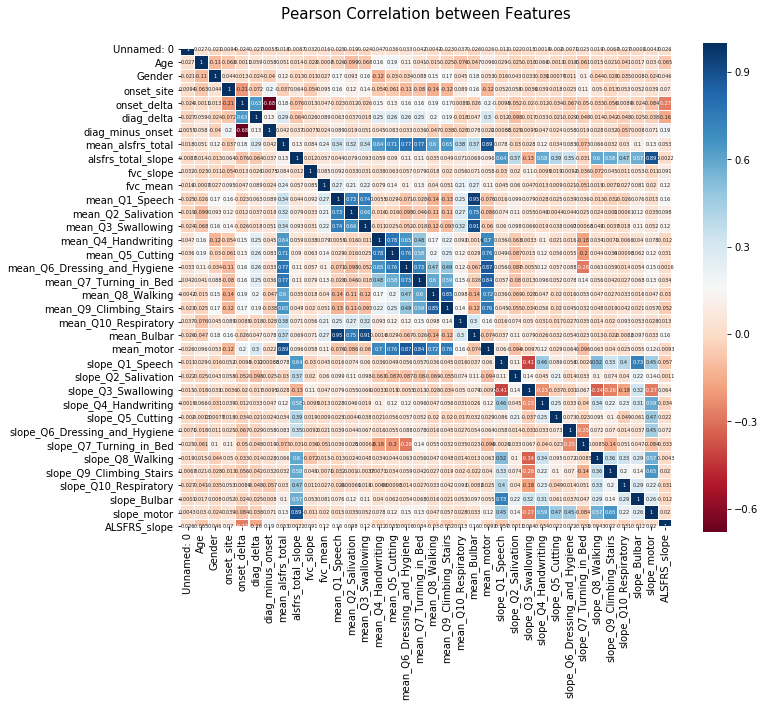

In [7]:
colormap = plt.cm.RdBu
plt.figure(figsize=(11, 9))
plt.title('Pearson Correlation between Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(), linewidths=0.1, vmax=1.0,
	square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size":5})

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# feature의 VIF 계수를 출력
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif["features"] = df.columns
vif

,VIF Factor,features
0,21.165309,Age
1,3.109302,Gender
2,5.207957,onset_site
3,inf,onset_delta
4,inf,diag_delta
5,inf,diag_minus_onset
6,inf,mean_alsfrs_total
7,200.855481,alsfrs_total_slope
8,1.112649,fvc_slope
9,36.744920,fvc_mean


In [37]:
df1 = df.drop(['mean_alsfrs_total','diag_delta', 'mean_Bulbar', 'mean_motor', 'slope_Bulbar', 'slope_motor' ], axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif["features"] = df1.columns
vif

,VIF Factor,features
0,21.165121,Age
1,3.108295,Gender
2,5.206696,onset_site
3,9.136983,onset_delta
4,5.970303,diag_minus_onset
5,25.529416,alsfrs_total_slope
6,1.112173,fvc_slope
7,36.744920,fvc_mean
8,39.448948,mean_Q1_Speech
9,50.201701,mean_Q2_Salivation


In [32]:
df2 = df[['Age','Gender', 'onset_site', 'onset_delta', 'diag_minus_onset', 'alsfrs_total_slope', 'fvc_slope','fvc_mean','mean_Bulbar', 'mean_motor', 'slope_Bulbar', 'slope_motor','mean_Q10_Respiratory','slope_Q10_Respiratory' ]]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df2.values, i) for i in range(df2.shape[1])]
vif["features"] = df2.columns
vif

,VIF Factor,features
0,19.524929,Age
1,2.862548,Gender
2,5.104939,onset_site
3,8.943883,onset_delta
4,5.855285,diag_minus_onset
5,25.498278,alsfrs_total_slope
6,1.064611,fvc_slope
7,35.203673,fvc_mean
8,25.835983,mean_Bulbar
9,15.092892,mean_motor


In [33]:
df2 = df2.drop(columns=['fvc_mean'])
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df2.values, i) for i in range(df2.shape[1])]
vif["features"] = df2.columns
vif

,VIF Factor,features
0,18.323886,Age
1,2.862474,Gender
2,5.040551,onset_site
3,8.927879,onset_delta
4,5.854318,diag_minus_onset
5,25.488079,alsfrs_total_slope
6,1.063650,fvc_slope
7,23.245624,mean_Bulbar
8,14.385263,mean_motor
9,3.448410,slope_Bulbar


In [34]:
df2 = df2.drop(columns=['alsfrs_total_slope'])
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df2.values, i) for i in range(df2.shape[1])]
vif["features"] = df2.columns
vif

,VIF Factor,features
0,18.304003,Age
1,2.859173,Gender
2,5.040303,onset_site
3,8.913797,onset_delta
4,5.836207,diag_minus_onset
5,1.063491,fvc_slope
6,23.220155,mean_Bulbar
7,14.258914,mean_motor
8,1.160905,slope_Bulbar
9,1.210957,slope_motor


In [35]:
df2 = df2.drop(columns=['mean_Q10_Respiratory'])
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df2.values, i) for i in range(df2.shape[1])]
vif["features"] = df2.columns
vif

,VIF Factor,features
0,17.074969,Age
1,2.859151,Gender
2,4.929531,onset_site
3,8.394631,onset_delta
4,5.633768,diag_minus_onset
5,1.063427,fvc_slope
6,16.081037,mean_Bulbar
7,11.316713,mean_motor
8,1.157305,slope_Bulbar
9,1.200773,slope_motor


In [36]:
df1 = df1.drop(['mean_Q3_Swallowing','mean_Q7_Turning_in_Bed'], axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif["features"] = df1.columns
vif

,VIF Factor,features
0,20.960129,Age
1,3.064074,Gender
2,5.194454,onset_site
3,9.085770,onset_delta
4,5.957256,diag_minus_onset
5,24.868313,alsfrs_total_slope
6,1.105024,fvc_slope
7,35.807881,fvc_mean
8,31.056859,mean_Q1_Speech
9,45.804232,mean_Q2_Salivation


In [39]:
df.columns

Index(['Age', 'Gender', 'onset_site', 'onset_delta', 'diag_delta',
       'diag_minus_onset', 'mean_alsfrs_total', 'alsfrs_total_slope',
       'fvc_slope', 'fvc_mean', 'mean_Q1_Speech', 'mean_Q2_Salivation',
       'mean_Q3_Swallowing', 'mean_Q4_Handwriting', 'mean_Q5_Cutting',
       'mean_Q6_Dressing_and_Hygiene', 'mean_Q7_Turning_in_Bed',
       'mean_Q8_Walking', 'mean_Q9_Climbing_Stairs', 'mean_Q10_Respiratory',
       'mean_Bulbar', 'mean_motor', 'slope_Q1_Speech', 'slope_Q2_Salivation',
       'slope_Q3_Swallowing', 'slope_Q4_Handwriting', 'slope_Q5_Cutting',
       'slope_Q6_Dressing_and_Hygiene', 'slope_Q7_Turning_in_Bed',
       'slope_Q8_Walking', 'slope_Q9_Climbing_Stairs', 'slope_Q10_Respiratory',
       'slope_Bulbar', 'slope_motor'],
      dtype='object')

In [40]:
df3 = df[['Age', 'Gender', 'onset_site', 'onset_delta',
       'diag_minus_onset', 'alsfrs_total_slope',
       'fvc_slope', 'fvc_mean',  'mean_Q10_Respiratory',
       'mean_Bulbar', 'mean_motor', 'slope_Q1_Speech', 'slope_Q2_Salivation',
       'slope_Q3_Swallowing', 'slope_Q4_Handwriting', 'slope_Q5_Cutting',
       'slope_Q6_Dressing_and_Hygiene', 'slope_Q7_Turning_in_Bed',
       'slope_Q8_Walking', 'slope_Q9_Climbing_Stairs', 'slope_Q10_Respiratory',
       ]]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df3.values, i) for i in range(df3.shape[1])]
vif["features"] = df3.columns
vif

,VIF Factor,features
0,19.678132,Age
1,2.903330,Gender
2,5.163385,onset_site
3,8.996655,onset_delta
4,5.878250,diag_minus_onset
5,24.199391,alsfrs_total_slope
6,1.093091,fvc_slope
7,35.366875,fvc_mean
8,41.770802,mean_Q10_Respiratory
9,25.925132,mean_Bulbar
